# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

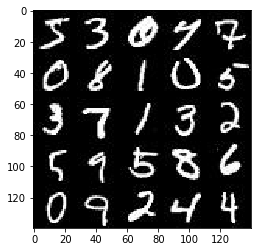

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

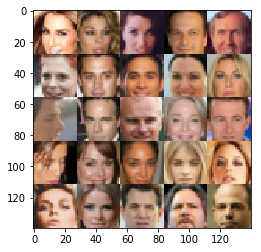

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/kris/anaconda/envs/tensorflow1/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels), name='real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None,z_dim), name='z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_inputs, z_inputs, learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse = reuse):
        
        alpha=0.2
        
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        n1 = tf.layers.batch_normalization(x1, training=True)
        relu1 = tf.maximum(alpha * n1, n1)
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        n2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * n2, n2)
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=0.05))
        n3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * n3, n3)

        flat = tf.contrib.layers.flatten(relu3)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse = not(is_train)):
        alpha=0.1
        
        #Fully connected layer
        x1 = tf.layers.dense(z,  7 * 7 * 512)
        
        #Reshape the fully connected layer to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        
        out = tf.tanh(logits)
        
        
    
    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real,labels = tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    is_train = tf.placeholder(tf.bool)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                 # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})

                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
               
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    #Print the current image
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.5659... Generator Loss: 2.1528
Epoch 1/2... Discriminator Loss: 1.5379... Generator Loss: 0.4353
Epoch 1/2... Discriminator Loss: 0.4075... Generator Loss: 4.1166
Epoch 1/2... Discriminator Loss: 0.3918... Generator Loss: 3.7285
Epoch 1/2... Discriminator Loss: 0.5298... Generator Loss: 2.1363
Epoch 1/2... Discriminator Loss: 1.5495... Generator Loss: 0.5582
Epoch 1/2... Discriminator Loss: 1.2605... Generator Loss: 1.0472
Epoch 1/2... Discriminator Loss: 1.3816... Generator Loss: 0.9085
Epoch 1/2... Discriminator Loss: 1.3642... Generator Loss: 0.8597
Epoch 1/2... Discriminator Loss: 1.4057... Generator Loss: 0.6162


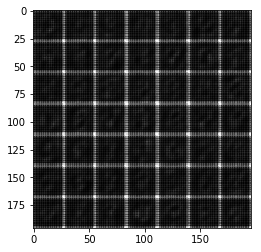

Epoch 1/2... Discriminator Loss: 1.2859... Generator Loss: 1.0404
Epoch 1/2... Discriminator Loss: 1.4489... Generator Loss: 0.6187
Epoch 1/2... Discriminator Loss: 1.3003... Generator Loss: 0.8411
Epoch 1/2... Discriminator Loss: 1.4091... Generator Loss: 0.7411
Epoch 1/2... Discriminator Loss: 1.7445... Generator Loss: 0.3927
Epoch 1/2... Discriminator Loss: 1.2310... Generator Loss: 0.9305
Epoch 1/2... Discriminator Loss: 1.5017... Generator Loss: 1.5384
Epoch 1/2... Discriminator Loss: 1.2148... Generator Loss: 1.1854
Epoch 1/2... Discriminator Loss: 1.1159... Generator Loss: 1.0057
Epoch 1/2... Discriminator Loss: 1.0770... Generator Loss: 1.2811


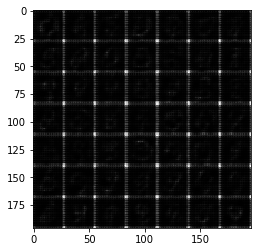

Epoch 1/2... Discriminator Loss: 1.0558... Generator Loss: 0.9920
Epoch 1/2... Discriminator Loss: 1.1910... Generator Loss: 0.7926
Epoch 1/2... Discriminator Loss: 1.2174... Generator Loss: 0.9040
Epoch 1/2... Discriminator Loss: 1.1963... Generator Loss: 0.7885
Epoch 1/2... Discriminator Loss: 1.0072... Generator Loss: 1.2759
Epoch 1/2... Discriminator Loss: 1.0026... Generator Loss: 1.0338
Epoch 1/2... Discriminator Loss: 0.9948... Generator Loss: 1.2420
Epoch 1/2... Discriminator Loss: 1.4595... Generator Loss: 0.5404
Epoch 1/2... Discriminator Loss: 1.1779... Generator Loss: 0.8209
Epoch 1/2... Discriminator Loss: 1.0624... Generator Loss: 1.0718


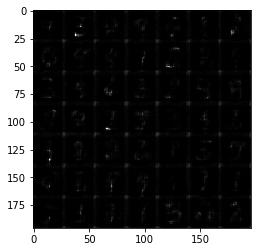

Epoch 1/2... Discriminator Loss: 1.0845... Generator Loss: 1.2265
Epoch 1/2... Discriminator Loss: 1.1507... Generator Loss: 1.2672
Epoch 1/2... Discriminator Loss: 1.0503... Generator Loss: 1.5284
Epoch 1/2... Discriminator Loss: 1.4260... Generator Loss: 0.5153
Epoch 1/2... Discriminator Loss: 1.0540... Generator Loss: 1.0127
Epoch 1/2... Discriminator Loss: 1.1745... Generator Loss: 0.7408
Epoch 1/2... Discriminator Loss: 1.5463... Generator Loss: 0.4082
Epoch 1/2... Discriminator Loss: 1.1371... Generator Loss: 0.7770
Epoch 1/2... Discriminator Loss: 1.2569... Generator Loss: 1.1632
Epoch 1/2... Discriminator Loss: 1.3068... Generator Loss: 0.9548


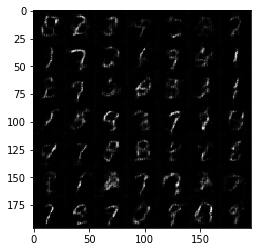

Epoch 1/2... Discriminator Loss: 1.2492... Generator Loss: 0.6576
Epoch 1/2... Discriminator Loss: 1.1012... Generator Loss: 1.1878
Epoch 1/2... Discriminator Loss: 1.1813... Generator Loss: 1.4495
Epoch 1/2... Discriminator Loss: 1.1717... Generator Loss: 0.7247
Epoch 1/2... Discriminator Loss: 1.0668... Generator Loss: 1.0400
Epoch 1/2... Discriminator Loss: 1.1634... Generator Loss: 0.8280
Epoch 1/2... Discriminator Loss: 1.2965... Generator Loss: 0.6032
Epoch 1/2... Discriminator Loss: 1.0537... Generator Loss: 1.0044
Epoch 1/2... Discriminator Loss: 1.2136... Generator Loss: 0.9993
Epoch 1/2... Discriminator Loss: 1.0512... Generator Loss: 0.9669


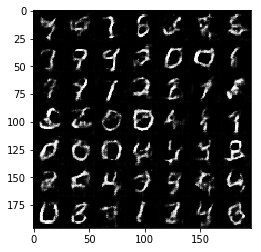

Epoch 1/2... Discriminator Loss: 1.3257... Generator Loss: 0.7951
Epoch 1/2... Discriminator Loss: 1.0554... Generator Loss: 1.0520
Epoch 1/2... Discriminator Loss: 1.1589... Generator Loss: 1.5786
Epoch 1/2... Discriminator Loss: 1.0649... Generator Loss: 1.1250
Epoch 1/2... Discriminator Loss: 1.2484... Generator Loss: 0.7232
Epoch 1/2... Discriminator Loss: 1.1934... Generator Loss: 1.4404
Epoch 1/2... Discriminator Loss: 1.7674... Generator Loss: 0.3377
Epoch 1/2... Discriminator Loss: 1.0595... Generator Loss: 1.0271
Epoch 1/2... Discriminator Loss: 1.3171... Generator Loss: 0.5938
Epoch 1/2... Discriminator Loss: 1.1209... Generator Loss: 1.1182


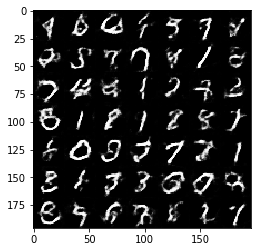

Epoch 1/2... Discriminator Loss: 1.1957... Generator Loss: 0.9682
Epoch 1/2... Discriminator Loss: 1.0970... Generator Loss: 1.3448
Epoch 1/2... Discriminator Loss: 1.2438... Generator Loss: 0.6705
Epoch 1/2... Discriminator Loss: 1.1149... Generator Loss: 1.3754
Epoch 1/2... Discriminator Loss: 1.1900... Generator Loss: 0.8920
Epoch 1/2... Discriminator Loss: 1.3693... Generator Loss: 0.6497
Epoch 1/2... Discriminator Loss: 1.1304... Generator Loss: 0.8388
Epoch 1/2... Discriminator Loss: 1.3687... Generator Loss: 0.6887
Epoch 1/2... Discriminator Loss: 1.1844... Generator Loss: 0.7542
Epoch 1/2... Discriminator Loss: 1.1810... Generator Loss: 0.9733


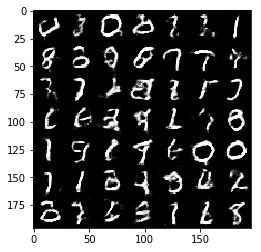

Epoch 1/2... Discriminator Loss: 1.3153... Generator Loss: 0.6276
Epoch 1/2... Discriminator Loss: 1.1503... Generator Loss: 0.7861
Epoch 1/2... Discriminator Loss: 1.2619... Generator Loss: 1.4155
Epoch 1/2... Discriminator Loss: 1.1774... Generator Loss: 1.7967
Epoch 1/2... Discriminator Loss: 1.1057... Generator Loss: 0.8862
Epoch 1/2... Discriminator Loss: 1.1179... Generator Loss: 1.0378
Epoch 1/2... Discriminator Loss: 1.0953... Generator Loss: 0.9613
Epoch 1/2... Discriminator Loss: 1.6954... Generator Loss: 0.4052
Epoch 1/2... Discriminator Loss: 1.2143... Generator Loss: 0.9738
Epoch 1/2... Discriminator Loss: 1.1321... Generator Loss: 0.8273


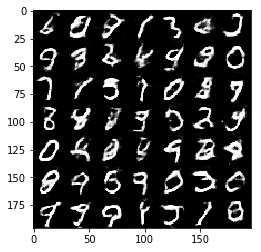

Epoch 1/2... Discriminator Loss: 1.1594... Generator Loss: 1.6652
Epoch 1/2... Discriminator Loss: 1.0795... Generator Loss: 1.1741
Epoch 1/2... Discriminator Loss: 1.1949... Generator Loss: 1.0751
Epoch 1/2... Discriminator Loss: 0.8983... Generator Loss: 1.6346
Epoch 1/2... Discriminator Loss: 1.0547... Generator Loss: 1.5254
Epoch 1/2... Discriminator Loss: 1.4561... Generator Loss: 0.7638
Epoch 1/2... Discriminator Loss: 1.4193... Generator Loss: 1.8687
Epoch 1/2... Discriminator Loss: 1.1748... Generator Loss: 1.0993
Epoch 1/2... Discriminator Loss: 1.0233... Generator Loss: 0.9660
Epoch 1/2... Discriminator Loss: 1.1123... Generator Loss: 0.9204


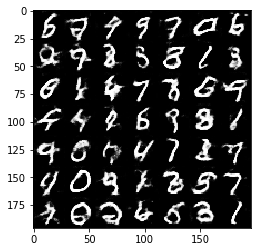

Epoch 1/2... Discriminator Loss: 1.1220... Generator Loss: 1.1213
Epoch 1/2... Discriminator Loss: 1.0624... Generator Loss: 1.0483
Epoch 1/2... Discriminator Loss: 1.1309... Generator Loss: 1.0535
Epoch 2/2... Discriminator Loss: 1.2406... Generator Loss: 0.7172
Epoch 2/2... Discriminator Loss: 1.1884... Generator Loss: 1.5997
Epoch 2/2... Discriminator Loss: 0.9985... Generator Loss: 1.3256
Epoch 2/2... Discriminator Loss: 1.0702... Generator Loss: 1.3017
Epoch 2/2... Discriminator Loss: 1.2175... Generator Loss: 0.8876
Epoch 2/2... Discriminator Loss: 1.0919... Generator Loss: 1.0008
Epoch 2/2... Discriminator Loss: 1.0577... Generator Loss: 0.9414


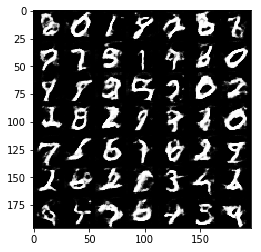

Epoch 2/2... Discriminator Loss: 1.2055... Generator Loss: 0.7624
Epoch 2/2... Discriminator Loss: 1.1356... Generator Loss: 1.3025
Epoch 2/2... Discriminator Loss: 1.0553... Generator Loss: 0.9334
Epoch 2/2... Discriminator Loss: 1.1578... Generator Loss: 1.1713
Epoch 2/2... Discriminator Loss: 1.0860... Generator Loss: 1.1035
Epoch 2/2... Discriminator Loss: 1.2610... Generator Loss: 0.6536
Epoch 2/2... Discriminator Loss: 1.2834... Generator Loss: 0.6333
Epoch 2/2... Discriminator Loss: 1.1148... Generator Loss: 0.9477
Epoch 2/2... Discriminator Loss: 1.0407... Generator Loss: 1.1605
Epoch 2/2... Discriminator Loss: 1.1671... Generator Loss: 0.8517


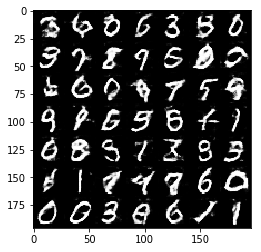

Epoch 2/2... Discriminator Loss: 1.0965... Generator Loss: 1.3774
Epoch 2/2... Discriminator Loss: 0.9942... Generator Loss: 1.1535
Epoch 2/2... Discriminator Loss: 1.0559... Generator Loss: 0.9071
Epoch 2/2... Discriminator Loss: 1.1653... Generator Loss: 1.3268
Epoch 2/2... Discriminator Loss: 1.1339... Generator Loss: 0.8775
Epoch 2/2... Discriminator Loss: 1.1679... Generator Loss: 0.7482
Epoch 2/2... Discriminator Loss: 1.0988... Generator Loss: 1.0098
Epoch 2/2... Discriminator Loss: 1.0750... Generator Loss: 1.0776
Epoch 2/2... Discriminator Loss: 1.2499... Generator Loss: 0.6864
Epoch 2/2... Discriminator Loss: 1.2018... Generator Loss: 0.7401


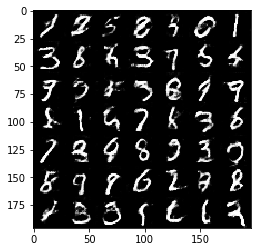

Epoch 2/2... Discriminator Loss: 1.2235... Generator Loss: 0.7146
Epoch 2/2... Discriminator Loss: 1.1849... Generator Loss: 1.1698
Epoch 2/2... Discriminator Loss: 1.0496... Generator Loss: 0.9697
Epoch 2/2... Discriminator Loss: 1.3226... Generator Loss: 0.6306
Epoch 2/2... Discriminator Loss: 1.2875... Generator Loss: 1.5253
Epoch 2/2... Discriminator Loss: 1.1908... Generator Loss: 1.5684
Epoch 2/2... Discriminator Loss: 1.1981... Generator Loss: 0.8164
Epoch 2/2... Discriminator Loss: 1.1298... Generator Loss: 1.0004
Epoch 2/2... Discriminator Loss: 1.0919... Generator Loss: 0.9400
Epoch 2/2... Discriminator Loss: 1.1212... Generator Loss: 1.0257


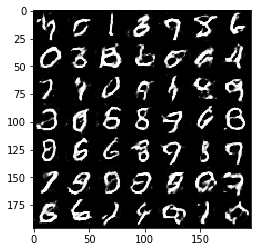

Epoch 2/2... Discriminator Loss: 1.1369... Generator Loss: 1.0762
Epoch 2/2... Discriminator Loss: 1.3688... Generator Loss: 1.4347
Epoch 2/2... Discriminator Loss: 1.0620... Generator Loss: 1.2209
Epoch 2/2... Discriminator Loss: 1.1590... Generator Loss: 1.4027
Epoch 2/2... Discriminator Loss: 1.3872... Generator Loss: 0.5672
Epoch 2/2... Discriminator Loss: 1.1000... Generator Loss: 0.9256
Epoch 2/2... Discriminator Loss: 1.1656... Generator Loss: 1.1289
Epoch 2/2... Discriminator Loss: 1.2425... Generator Loss: 0.6072
Epoch 2/2... Discriminator Loss: 1.1537... Generator Loss: 0.9147
Epoch 2/2... Discriminator Loss: 1.3729... Generator Loss: 1.9454


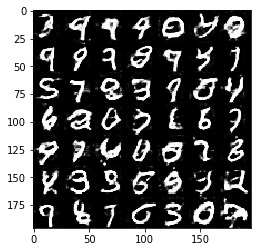

Epoch 2/2... Discriminator Loss: 1.2667... Generator Loss: 0.7228
Epoch 2/2... Discriminator Loss: 1.0909... Generator Loss: 1.3038
Epoch 2/2... Discriminator Loss: 1.2717... Generator Loss: 0.6736
Epoch 2/2... Discriminator Loss: 0.9953... Generator Loss: 0.9654
Epoch 2/2... Discriminator Loss: 1.1395... Generator Loss: 0.9316
Epoch 2/2... Discriminator Loss: 1.1941... Generator Loss: 0.7545
Epoch 2/2... Discriminator Loss: 1.0626... Generator Loss: 1.2220
Epoch 2/2... Discriminator Loss: 1.2504... Generator Loss: 0.6346
Epoch 2/2... Discriminator Loss: 1.2069... Generator Loss: 0.7482
Epoch 2/2... Discriminator Loss: 0.9656... Generator Loss: 1.2490


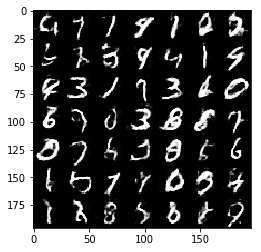

Epoch 2/2... Discriminator Loss: 1.2513... Generator Loss: 0.7895
Epoch 2/2... Discriminator Loss: 1.0345... Generator Loss: 1.0361
Epoch 2/2... Discriminator Loss: 1.1792... Generator Loss: 1.6462
Epoch 2/2... Discriminator Loss: 1.0086... Generator Loss: 1.3613
Epoch 2/2... Discriminator Loss: 1.0072... Generator Loss: 1.0327
Epoch 2/2... Discriminator Loss: 1.2115... Generator Loss: 0.6843
Epoch 2/2... Discriminator Loss: 1.2657... Generator Loss: 0.8054
Epoch 2/2... Discriminator Loss: 1.1852... Generator Loss: 1.1298
Epoch 2/2... Discriminator Loss: 1.3873... Generator Loss: 0.5685
Epoch 2/2... Discriminator Loss: 1.2086... Generator Loss: 0.7244


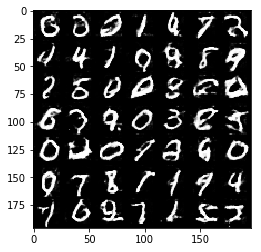

Epoch 2/2... Discriminator Loss: 1.2633... Generator Loss: 1.1784
Epoch 2/2... Discriminator Loss: 1.0988... Generator Loss: 1.4154
Epoch 2/2... Discriminator Loss: 1.0451... Generator Loss: 1.0458
Epoch 2/2... Discriminator Loss: 1.2417... Generator Loss: 0.7545
Epoch 2/2... Discriminator Loss: 1.1959... Generator Loss: 0.7545
Epoch 2/2... Discriminator Loss: 1.0347... Generator Loss: 0.9636
Epoch 2/2... Discriminator Loss: 1.1735... Generator Loss: 0.7933
Epoch 2/2... Discriminator Loss: 1.0347... Generator Loss: 1.5489
Epoch 2/2... Discriminator Loss: 1.3519... Generator Loss: 0.5400
Epoch 2/2... Discriminator Loss: 1.2975... Generator Loss: 0.6264


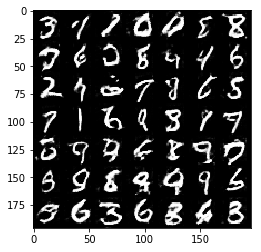

Epoch 2/2... Discriminator Loss: 1.1052... Generator Loss: 0.9660
Epoch 2/2... Discriminator Loss: 1.0221... Generator Loss: 1.4319
Epoch 2/2... Discriminator Loss: 1.2114... Generator Loss: 0.7026
Epoch 2/2... Discriminator Loss: 1.0780... Generator Loss: 1.0200
Epoch 2/2... Discriminator Loss: 1.1308... Generator Loss: 1.4271
Epoch 2/2... Discriminator Loss: 0.9886... Generator Loss: 1.1354
Epoch 2/2... Discriminator Loss: 1.0303... Generator Loss: 1.0383
Epoch 2/2... Discriminator Loss: 1.1114... Generator Loss: 0.9242
Epoch 2/2... Discriminator Loss: 0.8816... Generator Loss: 1.1397
Epoch 2/2... Discriminator Loss: 1.5076... Generator Loss: 0.5983


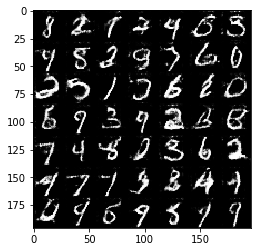

Epoch 2/2... Discriminator Loss: 1.2096... Generator Loss: 0.9470
Epoch 2/2... Discriminator Loss: 1.1669... Generator Loss: 0.8998
Epoch 2/2... Discriminator Loss: 1.0660... Generator Loss: 0.9974
Epoch 2/2... Discriminator Loss: 1.1226... Generator Loss: 0.9403
Epoch 2/2... Discriminator Loss: 1.1260... Generator Loss: 1.1770
Epoch 2/2... Discriminator Loss: 1.1666... Generator Loss: 0.9411
Epoch 2/2... Discriminator Loss: 1.2833... Generator Loss: 0.6237


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.5526... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 1.1728
Epoch 1/1... Discriminator Loss: 0.9888... Generator Loss: 1.0734
Epoch 1/1... Discriminator Loss: 0.7692... Generator Loss: 1.5372
Epoch 1/1... Discriminator Loss: 0.6899... Generator Loss: 1.7831
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.5689
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 1.1744
Epoch 1/1... Discriminator Loss: 1.0708... Generator Loss: 2.2659
Epoch 1/1... Discriminator Loss: 0.7612... Generator Loss: 1.6964


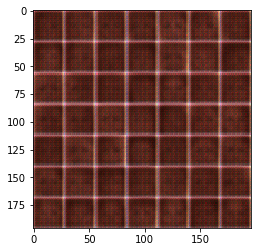

Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 2.6492
Epoch 1/1... Discriminator Loss: 0.9921... Generator Loss: 1.0462
Epoch 1/1... Discriminator Loss: 1.5436... Generator Loss: 2.6816
Epoch 1/1... Discriminator Loss: 1.1203... Generator Loss: 0.9340
Epoch 1/1... Discriminator Loss: 0.9407... Generator Loss: 5.0360
Epoch 1/1... Discriminator Loss: 1.8903... Generator Loss: 4.2908
Epoch 1/1... Discriminator Loss: 2.0417... Generator Loss: 5.3275
Epoch 1/1... Discriminator Loss: 1.4922... Generator Loss: 0.5453
Epoch 1/1... Discriminator Loss: 1.6638... Generator Loss: 2.6475
Epoch 1/1... Discriminator Loss: 1.6128... Generator Loss: 0.5923


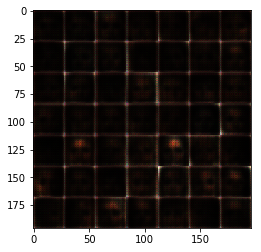

Epoch 1/1... Discriminator Loss: 1.4857... Generator Loss: 0.8195
Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.9561
Epoch 1/1... Discriminator Loss: 1.4928... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.8993... Generator Loss: 0.3096
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 1.5349
Epoch 1/1... Discriminator Loss: 1.5247... Generator Loss: 0.5048
Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 0.7615
Epoch 1/1... Discriminator Loss: 1.7259... Generator Loss: 0.3922
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 1.1978
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.5009


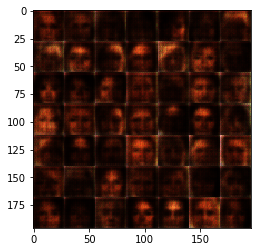

Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.5927
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.6415
Epoch 1/1... Discriminator Loss: 0.8656... Generator Loss: 1.2868
Epoch 1/1... Discriminator Loss: 1.8082... Generator Loss: 0.3839
Epoch 1/1... Discriminator Loss: 0.9945... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 1.1662
Epoch 1/1... Discriminator Loss: 1.3625... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 2.2907... Generator Loss: 0.1980
Epoch 1/1... Discriminator Loss: 1.6154... Generator Loss: 1.4111
Epoch 1/1... Discriminator Loss: 1.6954... Generator Loss: 0.4377


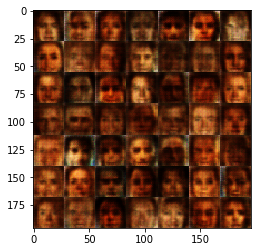

Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 1.1284
Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 1.1287
Epoch 1/1... Discriminator Loss: 1.4098... Generator Loss: 1.2289
Epoch 1/1... Discriminator Loss: 1.5158... Generator Loss: 0.6859
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 1.4955
Epoch 1/1... Discriminator Loss: 1.9739... Generator Loss: 0.4410
Epoch 1/1... Discriminator Loss: 1.5267... Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 1.9059... Generator Loss: 0.5740
Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.5963... Generator Loss: 0.5771


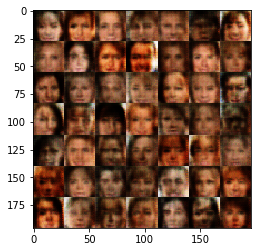

Epoch 1/1... Discriminator Loss: 1.5776... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 1.4561... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.7006... Generator Loss: 0.6213
Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.7760
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 0.9851
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 1.5740... Generator Loss: 0.6067
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.8064
Epoch 1/1... Discriminator Loss: 1.4181... Generator Loss: 0.7451
Epoch 1/1... Discriminator Loss: 1.4969... Generator Loss: 0.8343


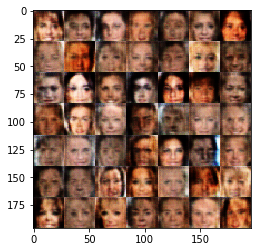

Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.7063
Epoch 1/1... Discriminator Loss: 1.4700... Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.5211... Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 1.0557
Epoch 1/1... Discriminator Loss: 1.5112... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.5009... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.4374... Generator Loss: 0.8252


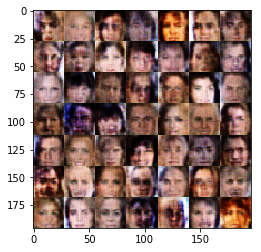

Epoch 1/1... Discriminator Loss: 1.5228... Generator Loss: 0.8156
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 0.8628
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.7958
Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.9285
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.8502
Epoch 1/1... Discriminator Loss: 1.3654... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.8448
Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.3556... Generator Loss: 0.8961
Epoch 1/1... Discriminator Loss: 1.4510... Generator Loss: 0.6485


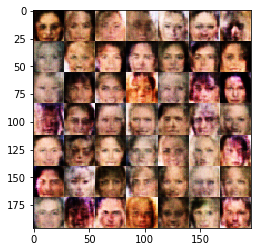

Epoch 1/1... Discriminator Loss: 1.4966... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.7341
Epoch 1/1... Discriminator Loss: 1.4603... Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.5217... Generator Loss: 0.6432
Epoch 1/1... Discriminator Loss: 1.3939... Generator Loss: 0.8983
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.9683
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.7905
Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 0.7772
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.4793... Generator Loss: 0.8514


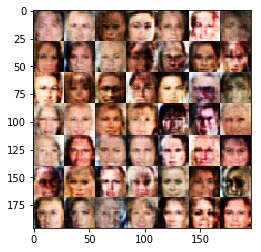

Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.7895
Epoch 1/1... Discriminator Loss: 1.4451... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.8785
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.8157
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.8422
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.8901
Epoch 1/1... Discriminator Loss: 1.4919... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 1.3764... Generator Loss: 0.7027
Epoch 1/1... Discriminator Loss: 1.5237... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.8651


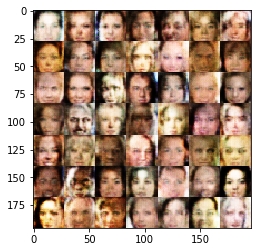

Epoch 1/1... Discriminator Loss: 1.3153... Generator Loss: 0.8323
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 0.9673
Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.8271
Epoch 1/1... Discriminator Loss: 1.4373... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.7269
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.7763
Epoch 1/1... Discriminator Loss: 1.4677... Generator Loss: 0.8672
Epoch 1/1... Discriminator Loss: 1.4721... Generator Loss: 0.6375
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.8256


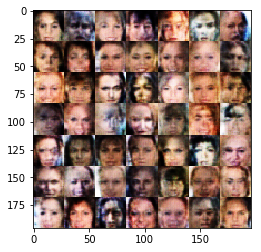

Epoch 1/1... Discriminator Loss: 1.5493... Generator Loss: 0.6288
Epoch 1/1... Discriminator Loss: 1.3227... Generator Loss: 0.8925
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.7584
Epoch 1/1... Discriminator Loss: 1.4503... Generator Loss: 0.7203
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.7644
Epoch 1/1... Discriminator Loss: 1.5503... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.8898
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.7899
Epoch 1/1... Discriminator Loss: 1.3026... Generator Loss: 0.8637


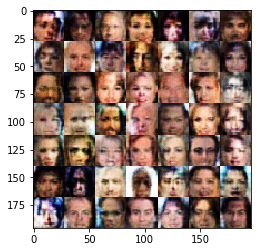

Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.8064
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.8137
Epoch 1/1... Discriminator Loss: 1.3155... Generator Loss: 0.8003
Epoch 1/1... Discriminator Loss: 1.3530... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.9318
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.7808
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.8989
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.7239
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.8846
Epoch 1/1... Discriminator Loss: 1.4667... Generator Loss: 0.6761


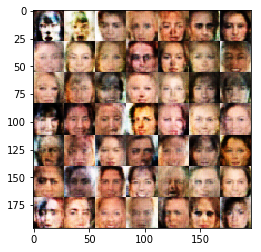

Epoch 1/1... Discriminator Loss: 1.3427... Generator Loss: 0.7601
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7770
Epoch 1/1... Discriminator Loss: 1.3038... Generator Loss: 1.0288
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.3259... Generator Loss: 0.8019
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.8680
Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 1.5192... Generator Loss: 0.8200
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.9534
Epoch 1/1... Discriminator Loss: 1.3650... Generator Loss: 0.8564


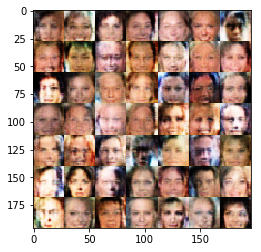

Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.3460... Generator Loss: 0.7777
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.8449
Epoch 1/1... Discriminator Loss: 1.4672... Generator Loss: 0.6271
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.8330
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.8851
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 1.4578... Generator Loss: 0.7712


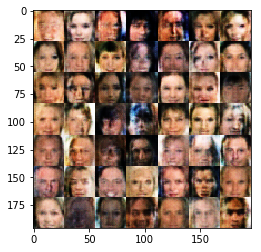

Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.8757
Epoch 1/1... Discriminator Loss: 1.4591... Generator Loss: 0.8685
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 1.3417... Generator Loss: 0.8760
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.7757
Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 0.8195
Epoch 1/1... Discriminator Loss: 1.4203... Generator Loss: 0.8330
Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 0.8136
Epoch 1/1... Discriminator Loss: 1.4087... Generator Loss: 0.8016


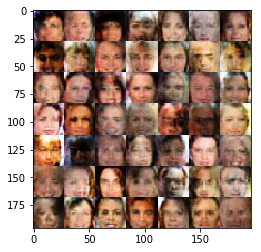

Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.7320
Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 0.7230
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 0.7629
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 1.0004
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.7903
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.8363
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.9626


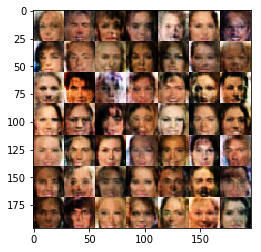

Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.7028
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 1.0464
Epoch 1/1... Discriminator Loss: 1.3677... Generator Loss: 0.9093
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.9034
Epoch 1/1... Discriminator Loss: 1.3190... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.9375


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.